In [1]:
import pandas as pd
import os
import numpy as np
import scipy as ss
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import print_function
import cobra
from corda import reaction_confidence
from corda import CORDA

In [2]:
data = "/Users/annasintsova/git_repos/"\
        "HUTI-RNAseq/data/get_homologs_output/C50_S90_e0_/"\
        "run_C50_S90_e0__pan_C50_S90/"\
        "2018-02-26_pangenome_matrix_t0_crossRef.csv"
model = "/Users/annasintsova/git_repos/"\
        "HUTI-RNAseq/analysis/fba/2017-12-16-model-2/"\
        "data/HM54_homologues/HM54_model/HM54_iML1515.xml"

In [3]:
counts = pd.read_csv(data)
HM54_rpkm = counts[["MG1655", "HM54_UR_RPKM", "HM54_UTI_RPKM"]]
HM54_rpkm = HM54_rpkm.dropna(subset=["MG1655"])
HM54_rpkm = HM54_rpkm[HM54_rpkm.MG1655 != "PARALOGS"]
HM54_rpkm.set_index('MG1655', inplace=True)
HM54_rpkm = HM54_rpkm.dropna()

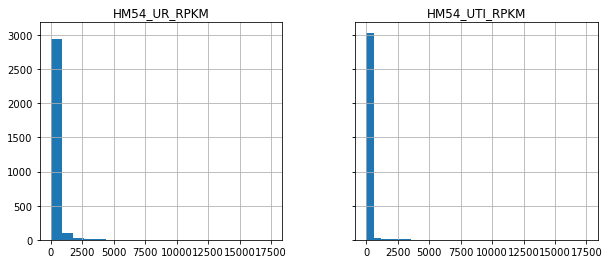

In [4]:
HM54_rpkm.hist(sharex=True, sharey=True, figsize=(10,4),bins=20);

In [5]:
# Let's play
def assignConfidence2(x):
    if x > 1000.0:
        return 3
    elif x > 100.0:
        return 2
    elif x > 10.0:
        return 1
    elif x <= 10.0:
        return -1

In [6]:
confidences = {'UR_conf':list(map(assignConfidence2, HM54_rpkm.HM54_UR_RPKM.values)),
               'UTI_conf':list(map(assignConfidence2, HM54_rpkm.HM54_UTI_RPKM.values))}
HM54 = pd.DataFrame(confidences,index = HM54_rpkm.index)
ur_conf = HM54.UR_conf.to_dict()
uti_conf = HM54.UTI_conf.to_dict()

In [13]:
base = cobra.io.read_sbml_model(model)

In [ ]:
# UTI
conf = {}
for r in base.reactions:
    conf[r.id]=reaction_confidence(r.gene_reaction_rule, uti_conf)
opt = CORDA(base, conf)
opt.build()
opt


In [ ]:
print([opt.model.reactions.get_by_id(k).id for k, 
       used in opt.included.items() if used])

In [ ]:
from corda import test_model

mod = test_model()
len(mod.reactions)

In [4]:
base.reactions.EX_dxylnt_e

Reaction identifier,EX_dxylnt_e
Name,D-Xylonate exchange
Memory address,0x011c682a90
Stoichiometry,dxylnt_e --> D-Xylonate -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [3]:
urine_reactions = pd.read_csv("/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/"\
                                "fba/2018-03-21-clinical-strain-metabolism/"\
                              "data/2018-03-26-HM54-UR-BM-CORDA.tab", sep="\t", header=None, 
                              names=["reaction_id", "reaction_name"])

In [4]:
urine_reactions.shape

(494, 2)

In [5]:
uti_reactions = pd.read_csv("/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/"\
                                "fba/2018-03-21-clinical-strain-metabolism/"\
                              "data/2018-03-26-HM54-UTI-BM-CORDA.tab", sep="\t", header=None, 
                              names=["reaction_id", "reaction_name"])

In [6]:
uti_reactions.shape

(464, 2)

In [7]:
uRx = set(urine_reactions.reaction_id)
utiRx = set(uti_reactions.reaction_id)

In [8]:
both = uRx.intersection(utiRx)

In [9]:
len(both)

429

In [10]:
len(utiRx)

464

In [11]:
uti_specific = utiRx - uRx

In [12]:
uti_specific

{'2DDARAA',
 'ACOATA',
 'ACPPAT160',
 'ACPPAT161',
 'ACt2rpp',
 'ACtex',
 'APG3PAT160',
 'APG3PAT161',
 'CBMKr',
 'DHORD2',
 'DXYLONtex',
 'DXYLONtpp',
 'DXYLTD',
 'EX_ac_e',
 'EX_dxylnt_e',
 'FE2tpp',
 'FTHFLi',
 'GLUt2rpp',
 'GLUt4pp',
 'GLYCLTt4pp',
 'KAS15',
 'MDH',
 'ME1',
 'METOX1s',
 'METOX2s',
 'METSOXR1',
 'METSOXR2',
 'MN2tpp',
 'NADHPO',
 'PDH',
 'PDX5PO2',
 'POR5',
 'RPE',
 'TALA',
 'VPAMTr'}

In [21]:
with open("../data/2018-03-27-uti-specific-reactions.tab", "w+") as fo:
    fo.write("Reaction_id\tReaction_name\tGene_reaction_rule\n")
    for rx in uti_specific:
        reaction = base.reactions.get_by_id(rx)
        print(reaction.id, "\t", reaction.name, "\t", reaction.gene_reaction_rule)
        fo.write(reaction.id + "\t" + reaction.name +"\t" + reaction.gene_reaction_rule + "\n")

CBMKr 	 Carbamate kinase 	 b0521
PDX5PO2 	 Pyridoxine 5'-phosphate oxidase (anaerboic 	 
GLUt2rpp 	 L-glutamate transport via proton symport, reversible (periplasm) 	 b4077
RPE 	 Ribulose 5-phosphate 3-epimerase 	 b3386
ACPPAT160 	 Acyl-(acyl carrier protein):phosphate acyltransferase (C16:0) 	 b1094 and b1090
DXYLONtex 	 D-xylonate transport via diffusion (extracellular) 	 b1377 or b0929 or b2215
ACOATA 	 Acetyl-CoA ACP transacylase 	 b1094 and b1091
APG3PAT160 	 Acyl-phosphate:glycerol-3-phosphate acyltransferase (C16:0) 	 b3059
FE2tpp 	 Iron (+2) transport in via permease (no H+) 	 b3040
MDH 	 Malate dehydrogenase 	 b3236
VPAMTr 	 Valine-pyruvate aminotransferase 	 b3572
DHORD2 	 Dihydoorotic acid dehydrogenase (quinone8) 	 b0945
DXYLONtpp 	 D-xylonate reversible tranposrt (periplasm) 	 
METSOXR2 	 L-methionine-R-sulfoxide reductase 	 ( b2582 and b1778 ) or ( b3781 and b1778 ) or ( b1832 and b3781 ) or ( b1832 and b2582 )
ACPPAT161 	 Acyl-(acyl carrier protein):phosphate acyltransfe

In [24]:
ur_specific = uRx - utiRx

In [25]:
ur_specific

{'ACALD',
 'AKGDH',
 'ASPO4',
 'ASPO5',
 'ASPO6',
 'CAT',
 'CBPS',
 'COBALT2t3pp',
 'CYTK2',
 'DADK',
 'DGK1',
 'DHGLYH',
 'DRPA',
 'DURIPP',
 'EDA',
 'EDD',
 'EX_glyclt_e',
 'EX_gua_e',
 'FBP',
 'FDH4pp',
 'FE2t2pp',
 'FESD1s',
 'FESR',
 'FLDR2',
 'FORtppi',
 'FTHFD',
 'GCALDD',
 'GLCtex_copy1',
 'GLYCL',
 'GLYCLTDx',
 'GLYCLTDy',
 'GLYCLTtex',
 'GUAtex',
 'GUAtpp',
 'KAS14',
 'MDH2',
 'MNt2pp',
 'NADH5',
 'NI2t3pp',
 'NTD1',
 'NTD9',
 'NTPP1',
 'NTPP3',
 'NTPP4',
 'NTPP5',
 'NTPP7',
 'NTPP8',
 'P5CD',
 'PDX5POi',
 'PPM2',
 'PPPGO3',
 'PPS',
 'PROD3',
 'PROt2rpp',
 'PROt4pp',
 'PUNP3',
 'PYK2',
 'PYK3',
 'QMO3',
 'SPODM',
 'THD2pp',
 'THIORDXi',
 'UPPRT',
 'VALTA',
 'ZN2t3pp'}

In [17]:
x =base.reactions.NTPP1
x.g

Reaction identifier,NTPP1
Name,Nucleoside triphosphate pyrophosphorylase (dgtp)
Memory address,0x011dcdff98
Stoichiometry,dgtp_c + h2o_c --> dgmp_c + h_c + ppi_c DGTP C10H12N5O13P3 + H2O H2O --> DGMP C10H12N5O7P + H+ + Diphosphate
GPR,b0099 or b2781
Lower bound,0.0
Upper bound,1000.0


In [10]:
data = "/Users/annasintsova/git_repos/"\
        "HUTI-RNAseq/data/get_homologs_output/C50_S90_e0_/"\
        "run_C50_S90_e0__pan_C50_S90/"\
        "2018-02-26_pangenome_matrix_t0_crossRef.csv"
model = "/Users/annasintsova/git_repos/"\
        "HUTI-RNAseq/analysis/fba/2017-12-16-model-2/"\
        "data/HM43_homologues/HM43_model/HM43_iML1515.xml"

counts = pd.read_csv(data)
HM54_rpkm = counts[["MG1655", "HM54_UR_RPKM", "HM54_UTI_RPKM"]]
HM54_rpkm = HM54_rpkm.dropna(subset=["MG1655"])
HM54_rpkm = HM54_rpkm[HM54_rpkm.MG1655 != "PARALOGS"]
HM54_rpkm.set_index('MG1655', inplace=True)
HM54_rpkm = HM54_rpkm.dropna()


In [5]:
counts = pd.read_csv(data)
HM43_rpkm = counts[["MG1655", "HM43_UR_RPKM", "HM43_UTI_RPKM"]]
HM43_rpkm = HM43_rpkm.dropna(subset=["MG1655"])
HM43_rpkm = HM43_rpkm[HM43_rpkm.MG1655 != "PARALOGS"]
HM43_rpkm.set_index('MG1655', inplace=True)
HM43_rpkm = HM43_rpkm.dropna()


In [6]:
def assignConfidence2(x):
    if x > 1000.0:
        return 2
    # elif x > 500.0:
    #     return 2
    # elif x > 100.0:
    #     return 1
    elif x <= 100.0:
        return -1
    else:
        return 0

In [7]:
def runCORDA(model, conf_dict, file_out, metabolite = ""):
    reaction_conf = {}
    for rx in model.reactions:
        if rx.id == "BIOMASS_Ec_iML1515_core_75p37M":
            reaction_conf[rx.id] = 3
        else:
            reaction_conf[rx.id] = reaction_confidence(rx.gene_reaction_rule, conf_dict)
    if not metabolite:
        opt = CORDA(model, reaction_conf)
        opt.build()
    else:
        opt = CORDA(model, reaction_conf, met_prod=metabolite)
        opt.build()
    print(opt)
    #cobra.io.write_sbml_model(opt.model, (file_out+".sbml"))
    #with open((file_out+".tab"), "w") as fh:
    #    for k, used in opt.included.items():
    #        if used:
    #            fh.write(opt.model.reactions.get_by_id(k).id +
    #                     "\t" + opt.model.reactions.get_by_id(k).name + "\n")

    return reaction_conf, opt

In [8]:
confidences = {'UR_conf':list(map(assignConfidence2, HM43_rpkm.HM43_UR_RPKM.values)),
               'UTI_conf':list(map(assignConfidence2, HM43_rpkm.HM43_UTI_RPKM.values))}

HM43 = pd.DataFrame(confidences,index=HM43_rpkm.index)
ur_conf = HM43.UR_conf.to_dict()
uti_conf = HM43.UTI_conf.to_dict()

In [11]:
base = cobra.io.read_sbml_model(model)


In [12]:
base.id


'HM43_iML1515'

In [13]:
HM43_rpkm[HM43_rpkm.HM43_UTI_RPKM > 1000].shape

(30, 2)

In [ ]:
#d1, m1 = runCORDA(base, ur_conf, "2018-03-26-HM54-UR-CORDA")
d2, m2 = runCORDA(base, uti_conf, "2018-03-28-HM43-UTI-CORDA")

In [ ]:
d1, m1 = runCORDA(base, ur_conf, "2018-03-26-HM54-UR-CORDA")

In [14]:
#d3, m3 = runCORDA(base, uti_conf, "2018-03-26-HM54-UTI-CORDA")

build status: reconstruction complete
Inc. reactions: 466/2626
 - unclear: 200/889
 - exclude: 224/1429
 - low and medium: 41/307
 - high: 1/1



In [41]:
hm54 = cobra.io.read_sbml_model(model)
print(len(hm54.reactions))

all_reactions = list(hm54.reactions)
for rx in all_reactions:
    if m2.included[rx.id] :
        continue
    else: 
        hm54.reactions.get_by_id(rx.id).remove_from_model()
        #print(len(hm54.reactions))
print(len(hm54.reactions))

2626
466


In [44]:
sol = hm54.optimize()

In [46]:
sol[sol.fluxes > 10]

ENO         18.274692
EX_ac_e     15.367080
EX_co2_e    18.395567
EX_h2o_e    25.388184
EX_h_e      17.800339
GAPD        18.715042
MOX         17.785819
NADHPO      17.785819
O2tex       17.830569
O2tpp       17.830052
PDH         16.489576
PTAr        15.212918
Name: fluxes, dtype: float64

In [48]:
hm54.metabolites.atp_c.summary()

PRODUCING REACTIONS -- ATP C10H12N5O13P3 (atp_c)
------------------------------------------------
%       FLUX  RXN ID      REACTION
---  -------  ----------  --------------------------------------------------
45%  18.7     PGK         3pg_c + atp_c <=> 13dpg_c + adp_c
37%  15.2     ACKr        ac_c + atp_c <=> actp_c + adp_c
18%   7.27    PYK         adp_c + h_c + pep_c --> atp_c + pyr_c

CONSUMING REACTIONS -- ATP C10H12N5O13P3 (atp_c)
------------------------------------------------
%       FLUX  RXN ID      REACTION
---  -------  ----------  --------------------------------------------------
49%  20       BIOMASS...  0.000223 10fthf_c + 2.6e-05 2fe2s_c + 0.000223 ...
21%   8.53    PFK         atp_c + f6p_c --> adp_c + fdp_c + h_c
17%   6.86    ATPM        atp_c + h2o_c --> adp_c + h_c + pi_c
2%    0.803   ADK1        amp_c + atp_c <=> 2.0 adp_c
2%    0.639   ACCOAC      accoa_c + atp_c + hco3_c --> adp_c + h_c + malc...
1%    0.613   ATPS4rpp    adp_c + 4.0 h_p + pi_c <=> atp_c + h

In [77]:
biomass = base.reactions.BIOMASS_Ec_iML1515_core_75p37M

In [78]:
hm54.add_reactions([biomass])

In [82]:
hm54.objective = 'BIOMASS_Ec_iML1515_core_75p37M'

In [83]:
hm54.objective.expression

-1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685 + 1.0*BIOMASS_Ec_iML1515_core_75p37M

In [86]:
base.objective.direction

'max'

In [87]:
base.objective.direction

'max'

In [88]:
hm54.optimize().objective_value

9.032438786461294e-19

In [90]:
base.optimize().objective_value

0.8769683954878539

In [94]:
print(m3)

build status: reconstruction complete
Inc. reactions: 466/2626
 - unclear: 200/889
 - exclude: 224/1429
 - low and medium: 41/307
 - high: 1/1



In [22]:
#2018-03-27

model = cobra.io.read_sbml_model("/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/fba/2018-03-21-clinical-strain-metabolism/data/2018-03-26-HM54-UTI-BM-CORDA.sbml")

In [26]:
model.reactions.BIOMASS_Ec_iML1515_core_75p37M

0

In [39]:
m2.model.flux

AttributeError: 'Model' object has no attribute 'flux'